## Exercício Avaliativo

Estudo, criação e exploração de outros algoritmos de clustering. Comparando os resultados do algoritmo escolhido com os produzidos com o K-means.

In [19]:
print("Marcelo Nascimento da Silva")

Marcelo Nascimento da Silva


In [20]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Algoritmos de Machine Learning
from sklearn.cluster import KMeans

# Função para carregar o dataset de treino
from sklearn import datasets
from sklearn import metrics

# Função de pré-processamento
from sklearn.preprocessing import scale

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [21]:
# Carregando os dataset com a função load_iris. Note que esta função retorna um objeto Bunch e não um DataFrame do pandas
iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [22]:
# Convertendo os dados para um Dataframe (para facilitar nas plotagens de gráficos)
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
targets = []
for valor in iris.target:
  if valor == 0:
    targets.append("setosa")
  elif valor == 1:
    targets.append("versicolor")
  else:
    targets.append("virginica")
iris_df["target"] = targets
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
# carregando o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# aplicando PCA para reduzir a dimensionalidade a 2D para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# função para plotar os clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.show()

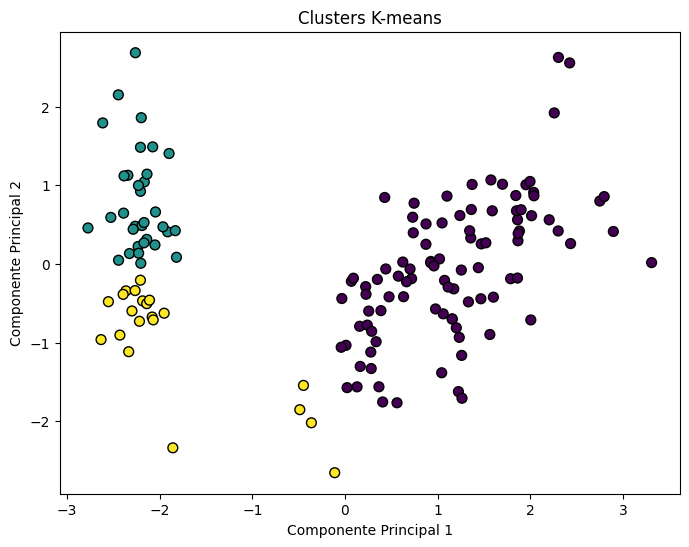

In [24]:
# aplicando K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# plotando os resultados do K-means
plot_clusters(X_pca, kmeans_labels, 'Clusters K-means')


- K-Means

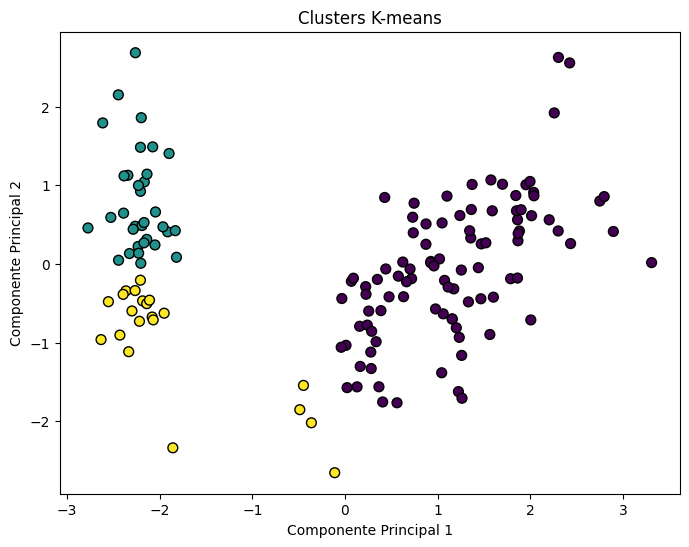

In [25]:
# aplicando K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# plotando os resultados do K-means
plot_clusters(X_pca, kmeans_labels, 'Clusters K-means')


- Agglomerative Clustering

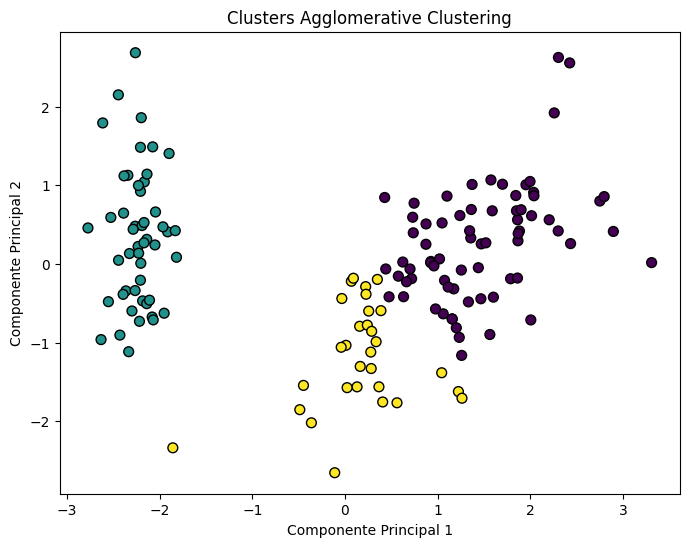

In [26]:
# aplicando Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_scaled)

# plotando os resultados do Agglomerative Clustering
plot_clusters(X_pca, agg_labels, 'Clusters Agglomerative Clustering')

- DBSCAN

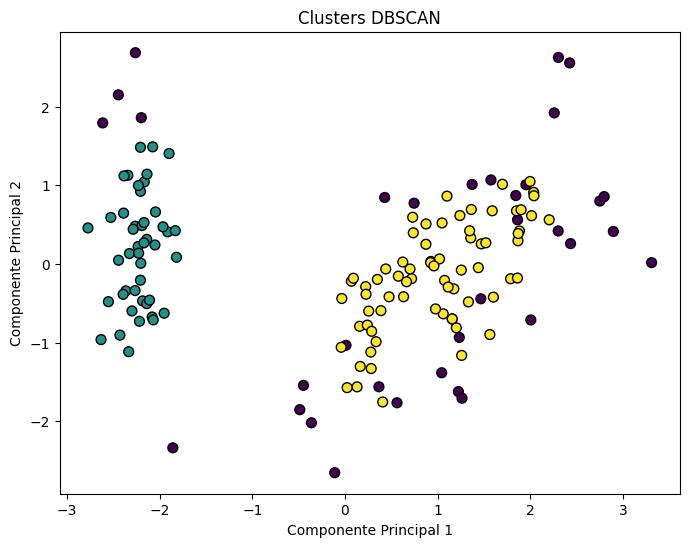

In [27]:
# aplicando DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# plotando os resultados do DBSCAN
plot_clusters(X_pca, dbscan_labels, 'Clusters DBSCAN')


- Comparação dos Resultados

In [28]:
# calculando o Silhouette Score para cada algoritmo
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
agg_silhouette = silhouette_score(X_scaled, agg_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else 'N/A'

print(f'Silhouette Score K-means: {kmeans_silhouette:.2f}')
print(f'Silhouette Score Agglomerative Clustering: {agg_silhouette:.2f}')
print(f'Silhouette Score DBSCAN: {dbscan_silhouette}')


Silhouette Score K-means: 0.48
Silhouette Score Agglomerative Clustering: 0.45
Silhouette Score DBSCAN: 0.3565164814270073


- Análise

Os clusters formados pelo K-means são esféricos devido à natureza do algoritmo que minimiza a soma das distâncias quadradas dos pontos ao centroide mais próximo.

O agglomerative clustering, ao usar uma abordagem hierárquica, pode produzir clusters de diferentes formas e tamanhos, ajustando-se melhor a certas distribuições de dados.

O dbscan é útil para encontrar clusters em dados com ruído e formações densas. no entanto, a escolha dos parâmetros (eps e min_samples) é crucial para seu desempenho. neste caso, não identificou claramente 3 clusters distintos no dataset Iris.
os silhouette scores fornecem uma medida quantitativa da qualidade dos clusters formados por cada algoritmo. o K-means geralmente tem um bom desempenho em dados bem definidos, enquanto o Agglomerative Clustering pode superar o K-means em cenários com clusters não esféricos. o DBSCAN pode ter um silhouette score não aplicável se não formar clusters definidos (muitos pontos podem ser considerados como ruído).